In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

## Names and Palette ##

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2023-02-20


'2023-02-20'

In [3]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
EBconc = '[EB] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [4]:
#Type_order = ['None', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X', 'WT']
Type_order = ['None',  'WT']
category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [5]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

#palette = [grey] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]
palette = [grey,cyan]
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


## Join Data ##

In [6]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [14]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('D:/Sofia/Data_Sheets_summer/CallumAnalysis_2021-04-14.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/CallumAnalysis_2021-04-22.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-03.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-08.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-20.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-21.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-29.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-03.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-12.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-17.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-19.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-25.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-08-27.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-09-08.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-09-10

In [15]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = data.append(d, ignore_index=True)
data[Type].unique()

array(['R102S', 'R303X', 'None', 'WT', 'P191R', 'Y64N', 'R178L', 'G223E',
       'R76S'], dtype=object)

In [16]:

data[Type] = data[Type].astype(category_Type)
data = data.sort_values(by=[Type, DCXconc])
#FIX CONCENTRATION
data[DCXconc] = data[DCXconc].apply(lambda x: round(x*2.27))
np.sort(data[DCXconc].unique())

array([  0,  32,  57,  79, 114, 227], dtype=int64)

In [17]:
data

,Date,Investigator,CH,[Tubulin] $(\mu M)$,[DCX] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
601,2020-07-03,Sofia,13,12.0,0,3.959000,4.024000,0.983847,0.901208,4.066000,0.083833,48.500994,False,None
602,2020-07-03,Sofia,13,12.0,0,7.490000,7.880333,0.950467,0.146708,7.918000,0.167667,47.224652,False,None
603,2020-07-03,Sofia,13,12.0,0,3.210000,3.521000,0.911673,0.230542,3.424000,0.251500,13.614314,False,None
604,2020-07-03,Sofia,13,12.0,0,12.840000,14.335500,0.895679,0.817375,12.947000,1.089833,11.879798,False,None
605,2020-07-03,Sofia,13,12.0,0,3.424000,3.940167,0.868999,0.649708,3.210000,0.251500,12.763419,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,2021-01-29,Sofia,22,6.0,227,3.729635,6.715666,0.555363,0.605930,0.845384,0.474046,1.783338,True,WT
8940,2021-01-29,Sofia,22,6.0,227,6.115573,10.743261,0.569247,5.305802,1.044122,0.789946,1.321763,True,WT
8941,2021-01-29,Sofia,22,6.0,227,4.376856,8.415779,0.520077,0.645753,1.342899,0.355596,3.776469,True,WT
8942,2021-01-29,Sofia,22,6.0,227,8.121382,16.386184,0.495624,0.530277,4.733321,2.453969,1.928843,True,WT


In [18]:
data.to_csv(path/(date+'_MasterSheet.csv'), encoding='utf-8', index=False)

## Open data if already saved ##

In [7]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')
data

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
0,2022-12-19,Brandi,1,6,0,0,0.6955,5.898500,0.117911,5.424389,1.070,0.251000,4.262948,False,None
1,2022-12-19,Brandi,1,6,0,0,0.8560,6.275000,0.136414,18.769222,1.070,0.251000,4.262948,False,None
2,2022-12-19,Brandi,1,6,0,0,0.8560,2.761000,0.310033,6.804889,0.856,0.167333,5.115538,False,None
3,2022-12-19,Brandi,1,6,0,0,1.0700,2.677333,0.399651,3.374556,1.070,0.167333,6.394422,False,None
4,2022-12-19,Brandi,1,6,0,0,0.7490,2.259000,0.331563,10.486222,0.856,0.083667,10.231076,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2023-01-02,Brandi,4,6,0,20,1.4980,1.176833,1.272908,4.988750,1.498,0.102333,14.638436,False,None
177,2023-01-02,Brandi,4,6,0,20,1.9260,1.637333,1.176303,6.779583,1.926,0.051167,37.641694,False,None
178,2023-01-02,Brandi,4,6,0,20,1.6050,1.790833,0.896231,10.258917,1.819,0.153500,11.850163,False,None
179,2023-01-02,Brandi,4,6,0,20,3.1030,3.172333,0.978144,12.305583,3.103,0.204667,15.161238,False,None


In [8]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/Brouhard Lab/OneDrive/Documentos/mcgill/brouhardlab/data/2023_1winter/brandi/Plots')

## Seaborn plot #

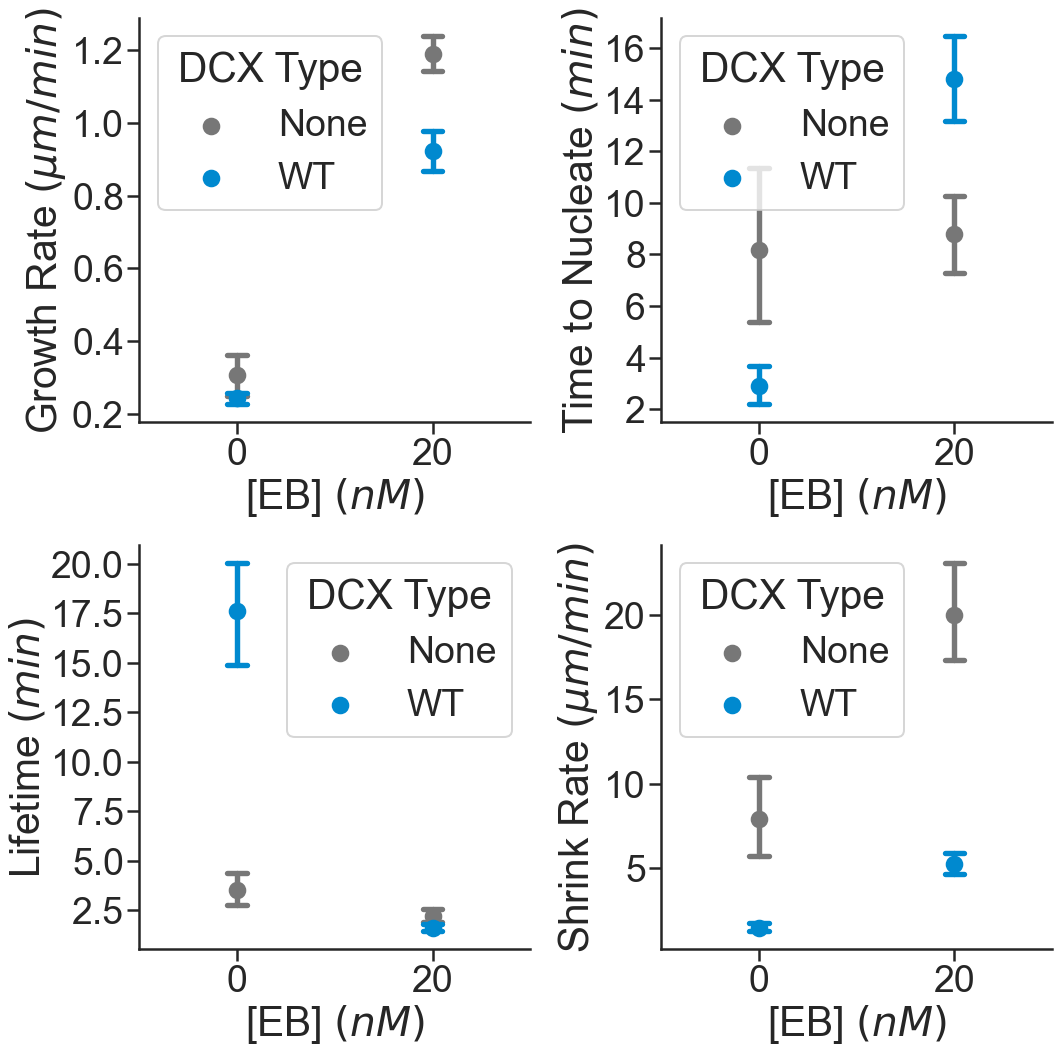

In [44]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=EBconc, y=parameters[c],
                        hue=Type, err_style="bars", marker='o', join=False, capsize=.1,
                        data=data[ (data[tubulin]==6)],err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#plt.savefig(path/('tub6uM_DCX-variable'+date+'.pdf'))
#plt.savefig(path/('tub6uM_DCX-variable'+date+'.png'))

C:\Users\Brouhard Lab\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brouhard Lab\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 49.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brouhard Lab\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brouhard Lab\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


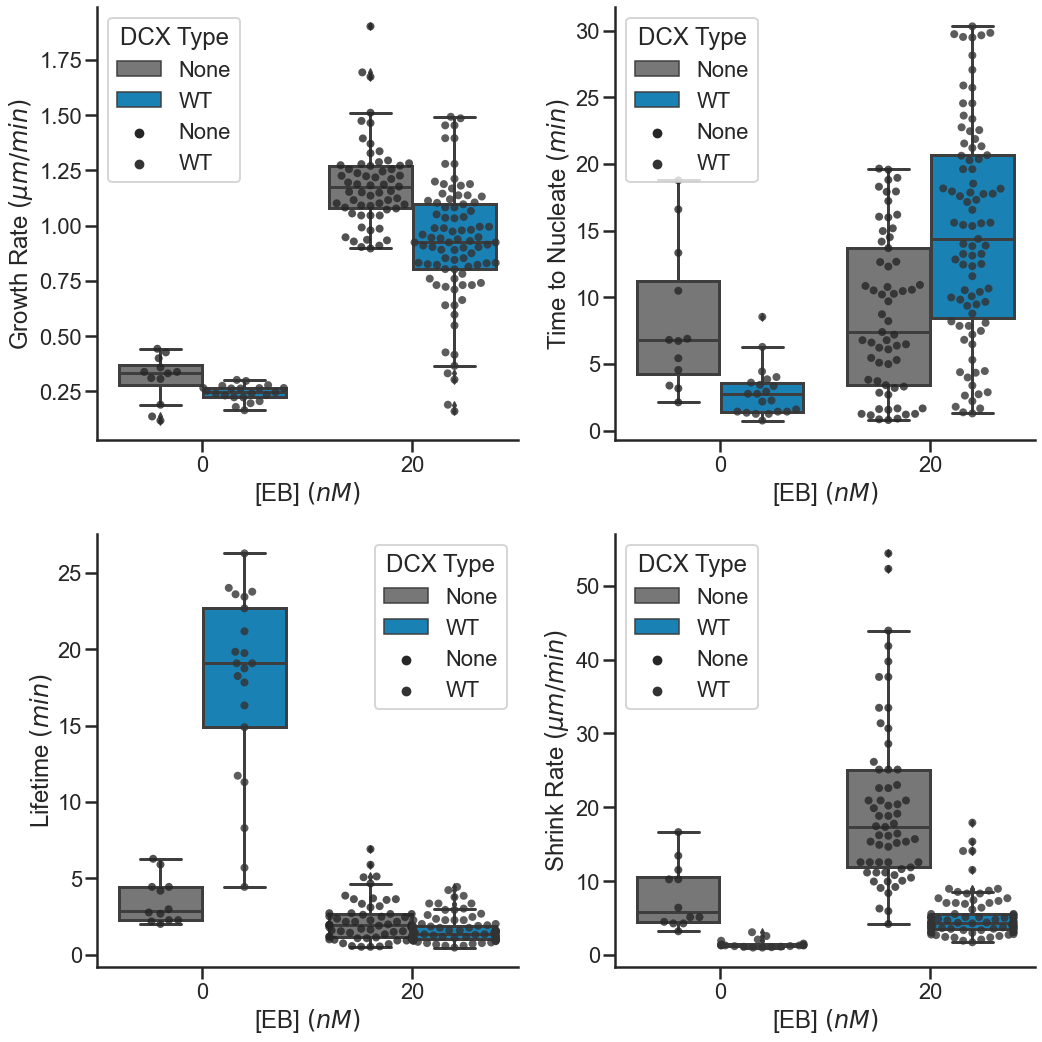

In [48]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.boxplot(x=EBconc, y=parameters[c],
                        hue=Type, dodge = True,
                        data=data[ (data[tubulin]==6)], palette=palette,ax=axs[i][j])
        sns.swarmplot(x=EBconc, y=parameters[c],
                        hue=Type, marker='o', dodge = True,
                        data=data[ (data[tubulin]==6)],alpha = 0.8, color=".2", size=8,ax=axs[i][j])
        
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#plt.savefig(path/('tub6uM_DCX-variable'+date+'.pdf'))
#plt.savefig(path/('tub6uM_DCX-variable'+date+'.png'))

# Fitting Data #

In [9]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


In [10]:
def make_hist(data, parameter, tubconc, dcxtype, dcxconc,ebconc) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
    
    if parameter == GrowthRate :
        maxbin = 1.5
        binsize = 0.05
#     elif parameter == ShrinkageRate :
#         maxbin = 15
#         binsize = 0.1
    else:
        maxbin = 30
        binsize = 1
        
    n, bins, patches = plt.hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), density=True);
    plt.clf()
       
    return n, bins

In [11]:
def equation_fit(data, parameter):
    
    if (parameter ==  GrowthRate) | (parameter == ShrinkageRate) :
        equation = gaussian
    elif parameter == TimeToNucleate :
        equation = exponential
    elif parameter == Lifetime :
        equation = gamma
        
    results = pd.DataFrame(columns=[] , index=[])
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                for ebconc in data[EBconc].unique():

                    n, bins =  make_hist(data, parameter, tubconc, dcxtype, dcxconc,ebconc)      

                    if np.isnan(np.sum(n)) == True:
                        continue

                    if equation == gamma :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n,[2,1])
                    else :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

                    variance = np.diagonal(var_matrix) #Refer [3]
                    SE = np.sqrt(variance) #Refer [4]

                #======Making a data frame========
                    results0 = pd.DataFrame(columns=[] , index=[])
                    
                    for k in np.arange(0,len(coeff)):
                        
                        r0 = pd.DataFrame([[coeff[k],SE[k]],],columns=['Fit', 'SE'])
                        r0['Coefficient'] = k
                        results0 = pd.concat([results0, r0], sort=False)
                        
#                     for k in np.arange(0,len(coeff)):
#                         header = [np.array([parameter]),np.array(['Coefficient '+ str(k)])]
#                         r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
#                         results0 = pd.concat([results0, r0], axis=1, sort=False)

                    results0[tubulin] = tubconc
                    results0[Type] = dcxtype
                    results0[DCXconc] = dcxconc
                    results0[EBconc] = ebconc
                    results0['Parameter'] = parameter

                    results = pd.concat([results, results0], sort=False)

    return results

In [12]:
newmydir = path/(date+'_fitdata')
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/Brouhard Lab/OneDrive/Documentos/mcgill/brouhardlab/data/2023_1winter/brandi/Plots/2023-02-20_fitdata')

In [13]:
GrowthRateFit = equation_fit(data, GrowthRate);
TimeToNucleateFit = equation_fit(data, TimeToNucleate);
LifetimeFit = equation_fit(data, Lifetime);
ShrinkageRateFit = equation_fit(data, ShrinkageRate);

C:\Users\Brouhard Lab\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


<Figure size 432x288 with 0 Axes>

In [14]:
GrowthRateFit['Moment'] = GrowthRateFit['Coefficient'].apply(lambda x: 'Mean' if x == 0 else 'Std')
TimeToNucleateFit['Moment'] = 'Mean'
ShrinkageRateFit['Moment'] = ShrinkageRateFit['Coefficient'].apply(lambda x: 'Mean' if x == 0 else 'Std')

In [15]:
GrowthRateFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,0.322131,0.008361,0,6,None,0,0,Growth Rate $(\mu m / min)$,Mean
0,0.053473,0.006841,1,6,None,0,0,Growth Rate $(\mu m / min)$,Std
0,1.134980,0.013839,0,6,None,0,20,Growth Rate $(\mu m / min)$,Mean
0,0.145150,0.011371,1,6,None,0,20,Growth Rate $(\mu m / min)$,Std
0,0.223938,0.001400,0,6,WT,60,0,Growth Rate $(\mu m / min)$,Mean
0,0.041353,0.001238,1,6,WT,60,0,Growth Rate $(\mu m / min)$,Std
0,0.913734,0.025771,0,6,WT,60,20,Growth Rate $(\mu m / min)$,Mean
0,0.208520,0.021081,1,6,WT,60,20,Growth Rate $(\mu m / min)$,Std


In [16]:
LifetimeCoeff0 = LifetimeFit[(LifetimeFit['Coefficient']==0)]['Fit'].values
LifetimeCoeff1 = LifetimeFit[(LifetimeFit['Coefficient']==1)]['Fit'].values
LifetimeSE0 = LifetimeFit[(LifetimeFit['Coefficient']==0)]['SE'].values
LifetimeSE1 = LifetimeFit[(LifetimeFit['Coefficient']==1)]['SE'].values
LifetimeMean = LifetimeCoeff0*LifetimeCoeff1
LifetimeSE = np.sqrt(np.square(LifetimeCoeff0*LifetimeSE1) + np.square(LifetimeCoeff1*LifetimeSE0))
LifetimeSE

array([ 0.46643321,  0.38571545, 11.43024409,  0.27069682])

In [17]:
LTmeandf = LifetimeFit[(LifetimeFit['Coefficient']==0)]
LTmeandf['Fit'] = LifetimeMean
LTmeandf['SE'] = LifetimeSE
LTmeandf['Coefficient'] = np.NaN
LTmeandf['Moment'] = 'Mean'
LTmeandf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,1.996857,0.466433,NaN,6,None,0,0,Lifetime $(min)$,Mean
0,1.596888,0.385715,NaN,6,None,0,20,Lifetime $(min)$,Mean
0,20.406574,11.430244,NaN,6,WT,60,0,Lifetime $(min)$,Mean
0,1.029896,0.270697,NaN,6,WT,60,20,Lifetime $(min)$,Mean


In [18]:
ResultFit = pd.concat([GrowthRateFit, TimeToNucleateFit,LifetimeFit,LTmeandf,ShrinkageRateFit], axis=0, sort=False)
ResultFit.to_csv(newmydir/('ResultFit_'+date+'.csv'), encoding='utf-8', index=False)
ResultFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,0.322131,0.008361,0.0,6,None,0,0,Growth Rate $(\mu m / min)$,Mean
0,0.053473,0.006841,1.0,6,None,0,0,Growth Rate $(\mu m / min)$,Std
0,1.134980,0.013839,0.0,6,None,0,20,Growth Rate $(\mu m / min)$,Mean
0,0.145150,0.011371,1.0,6,None,0,20,Growth Rate $(\mu m / min)$,Std
0,0.223938,0.001400,0.0,6,WT,60,0,Growth Rate $(\mu m / min)$,Mean
0,0.041353,0.001238,1.0,6,WT,60,0,Growth Rate $(\mu m / min)$,Std
0,0.913734,0.025771,0.0,6,WT,60,20,Growth Rate $(\mu m / min)$,Mean
0,0.208520,0.021081,1.0,6,WT,60,20,Growth Rate $(\mu m / min)$,Std
0,12.312598,4.538324,0.0,6,None,0,0,Time to Nucleate $(min)$,Mean
0,12.230672,2.494147,0.0,6,None,0,20,Time to Nucleate $(min)$,Mean


#  Open saved fit parameters  #

In [34]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
ResultFit = pd.read_csv(askFitParam, encoding='utf-8')
ResultFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,0.322131,0.008361,0.0,6,None,0,0,Growth Rate $(\mu m / min)$,Mean
1,0.053473,0.006841,1.0,6,None,0,0,Growth Rate $(\mu m / min)$,Std
2,1.134980,0.013839,0.0,6,None,0,20,Growth Rate $(\mu m / min)$,Mean
3,0.145150,0.011371,1.0,6,None,0,20,Growth Rate $(\mu m / min)$,Std
4,0.223938,0.001400,0.0,6,WT,60,0,Growth Rate $(\mu m / min)$,Mean
5,0.041353,0.001238,1.0,6,WT,60,0,Growth Rate $(\mu m / min)$,Std
6,0.913734,0.025771,0.0,6,WT,60,20,Growth Rate $(\mu m / min)$,Mean
7,0.208520,0.021081,1.0,6,WT,60,20,Growth Rate $(\mu m / min)$,Std
8,12.312598,4.538324,0.0,6,None,0,0,Time to Nucleate $(min)$,Mean
9,12.230672,2.494147,0.0,6,None,0,20,Time to Nucleate $(min)$,Mean


#  PLOT DATA  #

In [19]:
plotLT = ResultFit[(ResultFit['Parameter']==Lifetime) & (ResultFit['Moment']=='Mean')]
plotLT

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,1.996857,0.466433,NaN,6,None,0,0,Lifetime $(min)$,Mean
0,1.596888,0.385715,NaN,6,None,0,20,Lifetime $(min)$,Mean
0,20.406574,11.430244,NaN,6,WT,60,0,Lifetime $(min)$,Mean
0,1.029896,0.270697,NaN,6,WT,60,20,Lifetime $(min)$,Mean


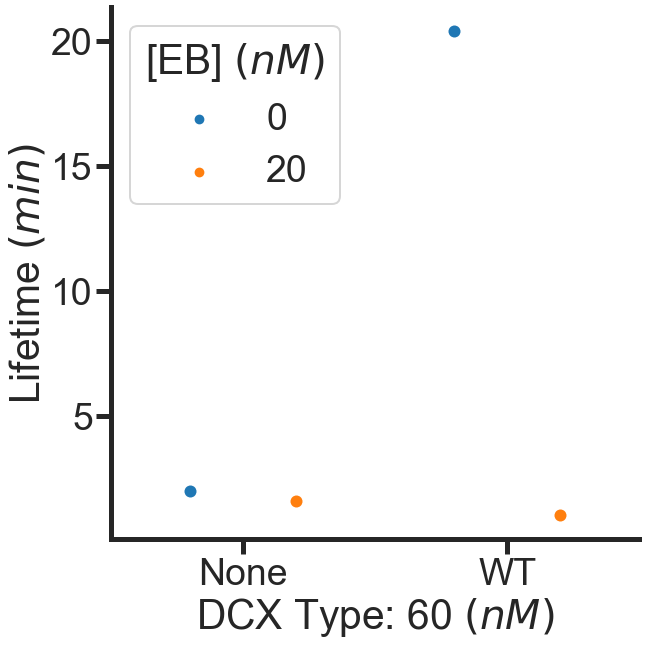

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

#rect = 0,0,1,1 # create an rectangle for the new axis
#log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
#log_ax.set_xscale("log") # log first

#ax = sns.boxplot(x= taxol, y='Expansion %', data=finalData, whis=np.inf, palette='Blues',linewidth=3)
ax = sns.swarmplot(x=Type, y='Fit',hue=EBconc, data=plotLT,dodge=True, size=12)

# ax.axhline(y = nogales2018, color = lightorange ,linestyle="--", linewidth=5.5, label='GDP'r'$\rightarrow$''GMPCPP \n Zhang (2018)')
# #plt.xlim(0.1,10)

# ax.set_ylim(-0.5,4)
# ax.legend( loc = 'lower right')
# #ax.legend('')
ax.set_ylabel(Lifetime)
ax.set_xlabel('DCX Type: 60 ' r'$(n M)$')

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


#plt.savefig(path/('expansion_'+date_today+'.svg'))

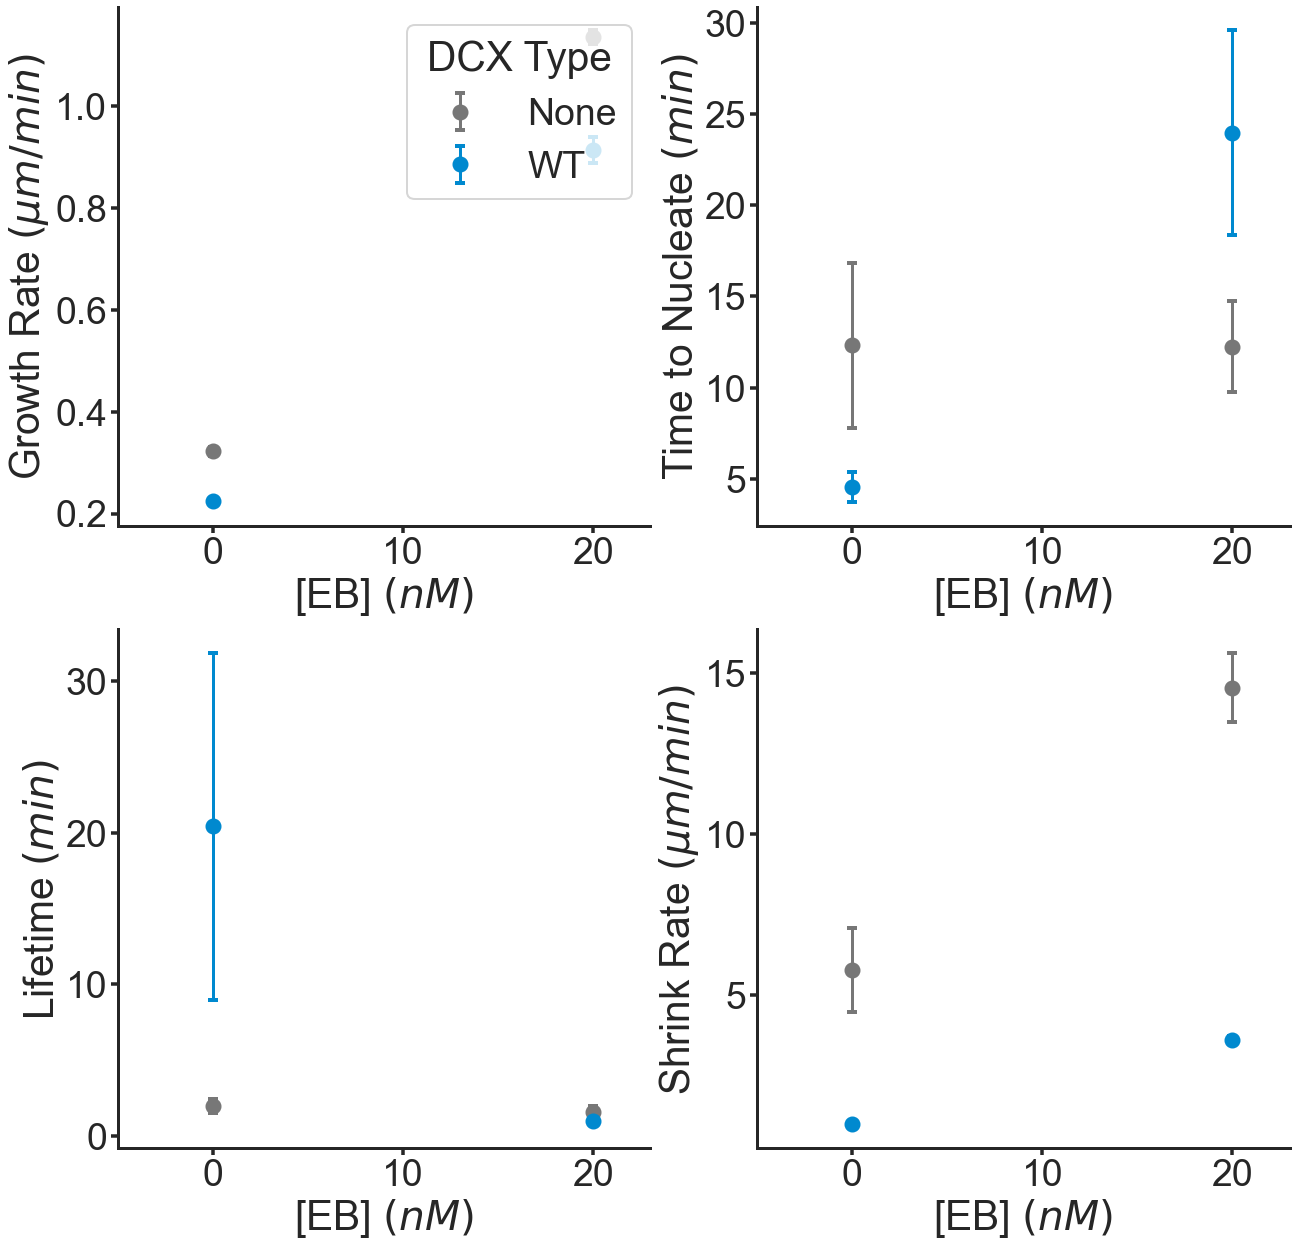

In [24]:
scattersize = 12
cap = 5

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

fig, ax = plt.subplots(2,2,figsize=(21,21))

count = 0
for dcxtype in ResultFit[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')]
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
    
            parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[c]]

            x = parameterMeanDF[EBconc].values
            y = parameterMeanDF['Fit'].values
            yerr = parameterMeanDF['SE'].values
            ax[i][j].errorbar(x , y , yerr= yerr , fmt=' ',marker='o', markersize=scattersize,capsize = cap,
                                          markeredgewidth=4, alpha = 1 ,color=palette[count])

            c += 1

    count += 1

# ax[0][0].set_ylim(0,1)
# ax[1][0].set_ylim(0,18)
# ax[0][1].set_ylim(0,10)
# ax[1][1].set_ylim(0,18)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-5,23)
        ax[i][j].set_xlabel(EBconc)
        #ax[i][j].set_xticks(np.arange(0, 23, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend((Type_order),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

ax[0][0].legend((Type_order),loc='upper right',title='DCX Type')


#plt.savefig(path/('expansion_'+date_today+'.svg'))

# Histogram #

In [53]:
def plot_hist(data, tubconc, dcxtype, dcxconc,ebconc,color) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
    fig, ax = plt.subplots(2,2,figsize=(21,21))
    
    n = len(selectdata.dropna().index)
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            parameter = parameters[c]

            if parameter == GrowthRate :
                maxbin = 1.5
                binsize = 0.025
#             elif parameter == ShrinkageRate :
#                 maxbin = 25
#                 binsize = 0.5
            else:
                maxbin = 30
                binsize = 0.5

            ax[i][j].hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), 
                          density=True,color = color,alpha = 0.5);
            ax[i][j].set_xlabel(parameter)
            ax[i][j].set_ylabel('Probability')
            ax[1][1].set_xlim(0,maxbin)
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['left'].set_lw(3)
            ax[i][j].spines['bottom'].set_lw(3)
            
            c += 1
    
    selectcoeff = ResultFit.dropna(subset=['Coefficient'])
    selectcoeff=selectcoeff[(selectcoeff[tubulin]==tubconc) & (selectcoeff[Type]==dcxtype) 
                            & (selectcoeff[DCXconc]==dcxconc)& (selectcoeff[EBconc]==ebconc)]
    
    x = np.arange(0, 1.5 + 0.025, 0.025)
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[0][0].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    x = np.arange(0, 30 + 0.5, 0.5)
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[1]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    ax[0][1].plot(x, exponential(x, scale),color = color, lw=4);
    
    shape = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][0].plot(x, gamma(x, shape, scale),color = color, lw=4);
            
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][1].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    legnd = str(dcxconc)+' nM'
    ax[0][1].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    ax[1][0].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    
    #plt.savefig(newmydir/('joint_graphsHIST-'+dcxtype+'-'+str(dcxconc)+'.pdf'))
    
    return print(n)

87


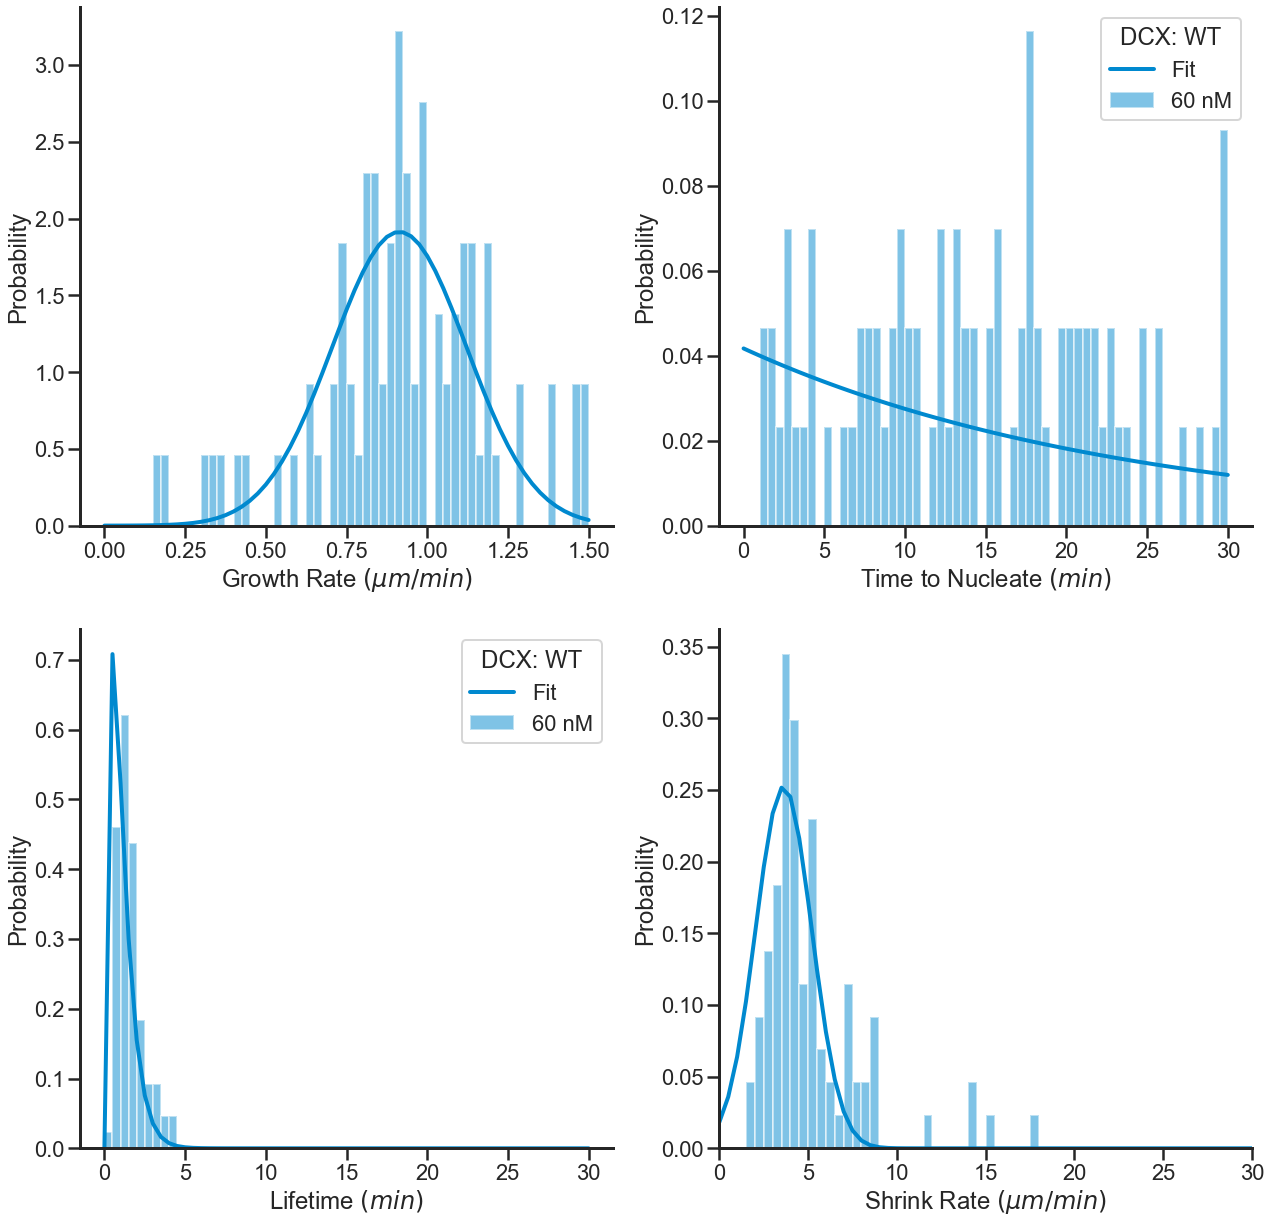

In [86]:
plot_hist(data, 6, 'WT', 60,20,cyan)

## Reproducibility ##

In [87]:
tubconc = 6
dcxtype = 'WT'
dcxconc = 60
ebconc = 20
selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]

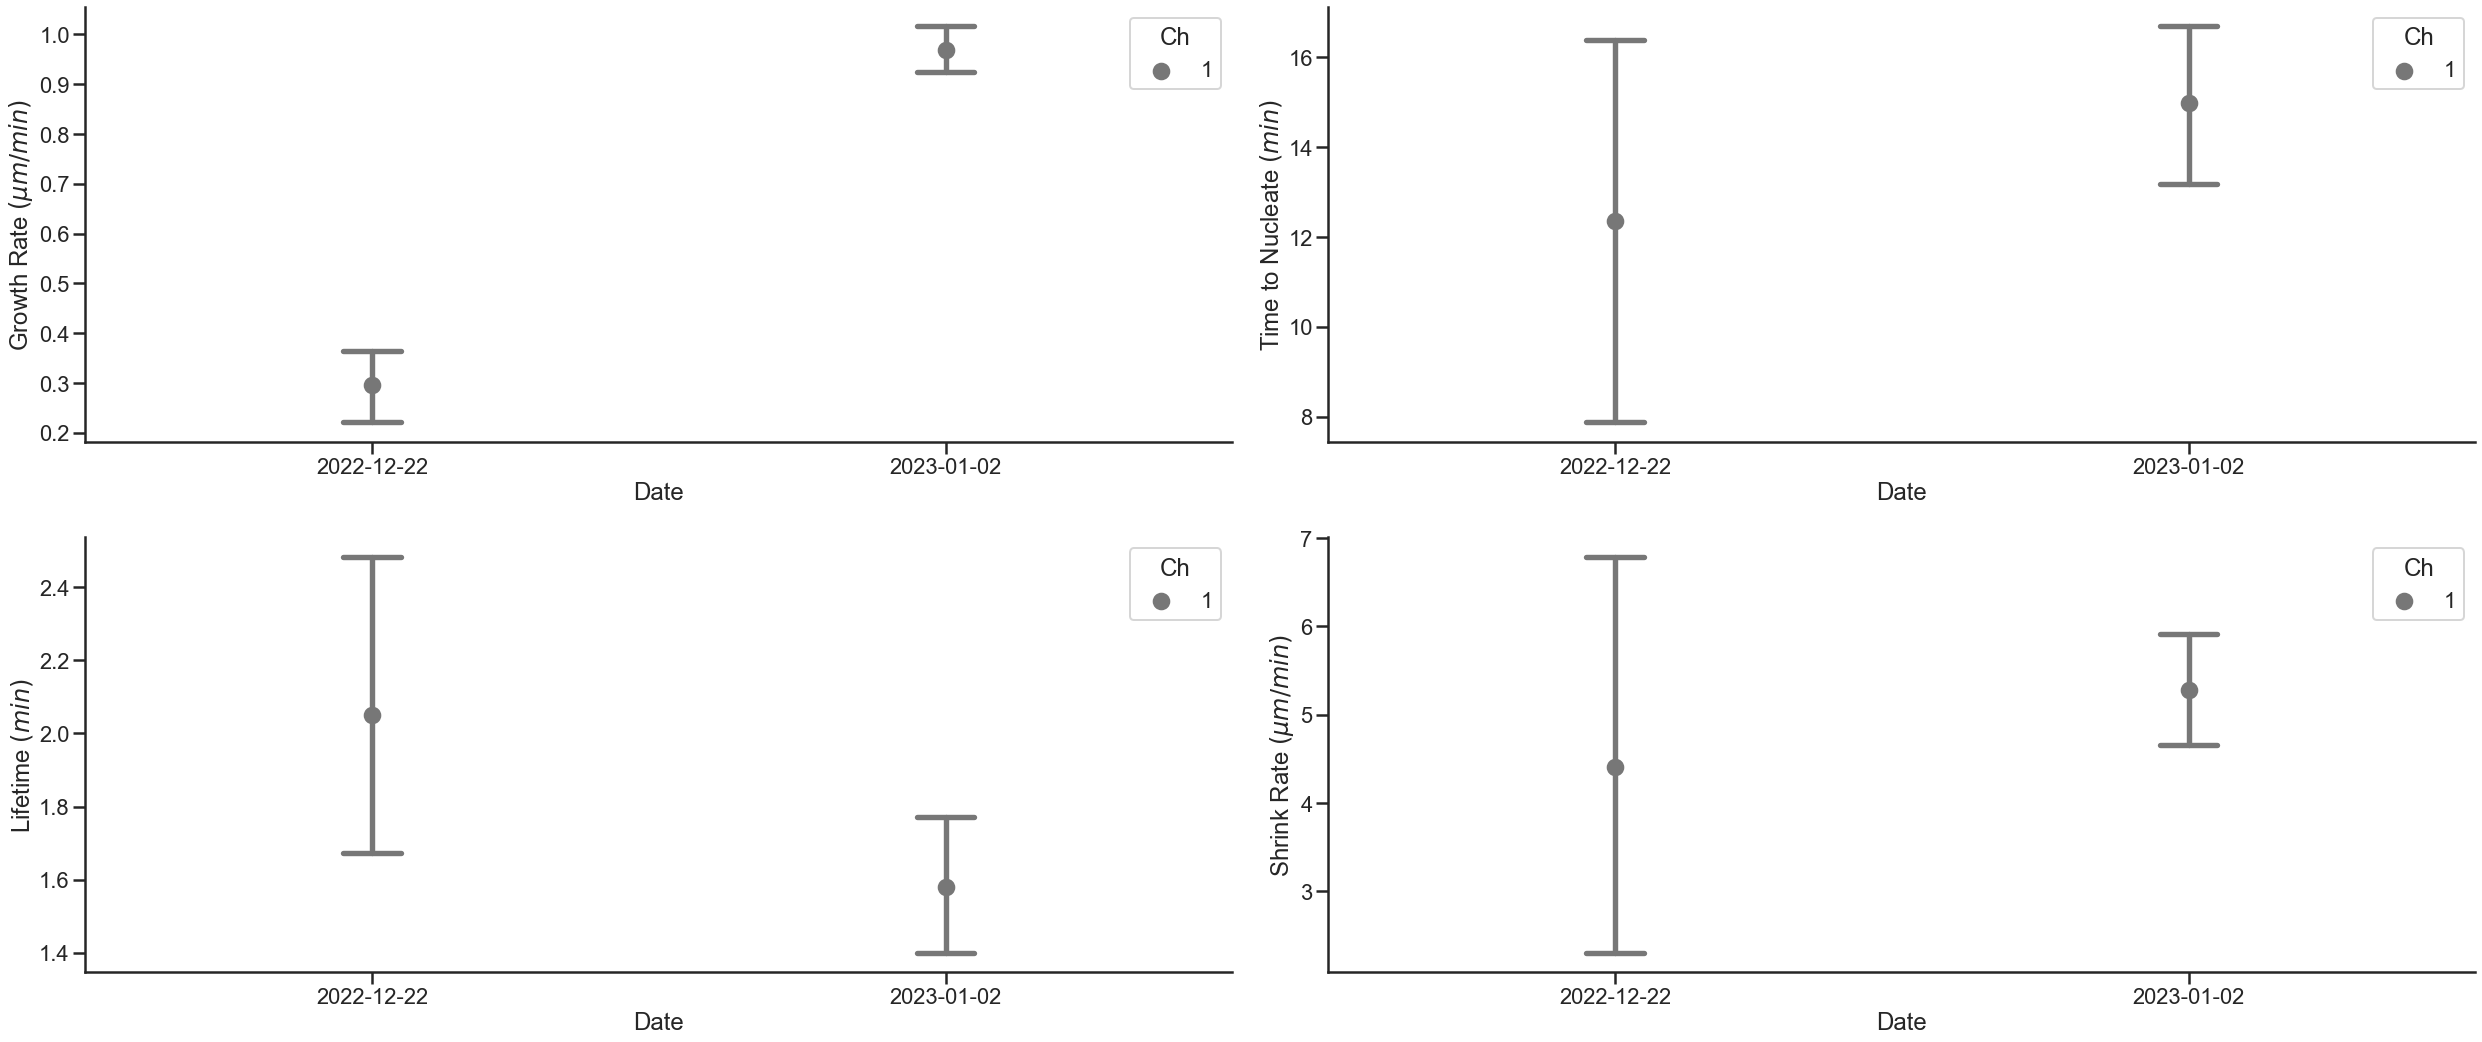

In [89]:
fig, axs = plt.subplots(2,2,figsize=(35,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x='Date', y=parameters[c],
                        hue='Ch', err_style="bars", marker='o', join=False, capsize=.1,
                        data=selectdata,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
# axs[0][0].set_ylim(0,1.5)
# axs[1][0].set_ylim(0,18)
# axs[0][1].set_ylim(0,10)
# axs[1][1].set_ylim(0,18)       
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()


# Rescues #

In [76]:
def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                for ebconc in data[EBconc].unique():

                    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
                    n =  selectdata[Type].count()

                    if n == 0:
                        continue
                        
                    rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                    rescue_values = 1-rv.loc[0][0]
                

                #======Making a data frame========
                    r0 = {tubulin:[tubconc], Type:[dcxtype], DCXconc:[dcxconc], EBconc:[ebconc], 'Normalized Rescue': [rescue_values],
                         'n': [n]}
                    results0 = pd.DataFrame(data=r0)
                    results = pd.concat([results, results0], sort=False)

    return results

In [77]:
rescues = rescue_count(data)
rescues

,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Normalized Rescue,n
0,6,None,0,0,0.000000,12
0,6,None,0,20,0.032787,61
0,6,WT,60,0,0.666667,21
0,6,WT,60,20,0.000000,87


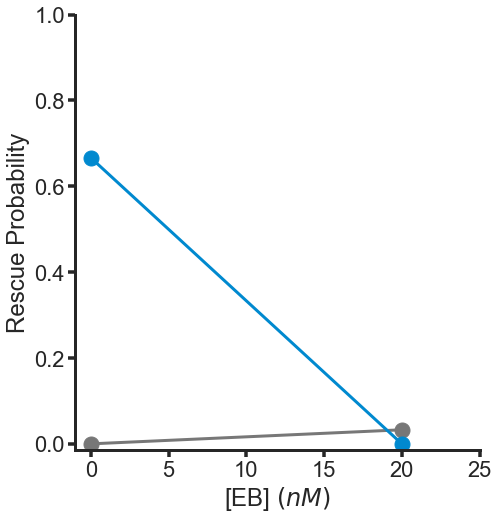

In [92]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique(): #data[Type].unique()

    x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][EBconc]

    y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)]['Normalized Rescue']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15)
    
    else:
        
        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15, ls='--',alpha=0.8)

    count += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,1)
ax.set_xlim(-1,25)
ax.set_xlabel( EBconc)


#ax.set_title('Rescue')
ax.set_ylabel('Rescue Probability')


#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsRescues_all.svg'))

# Lifetime Parameters #

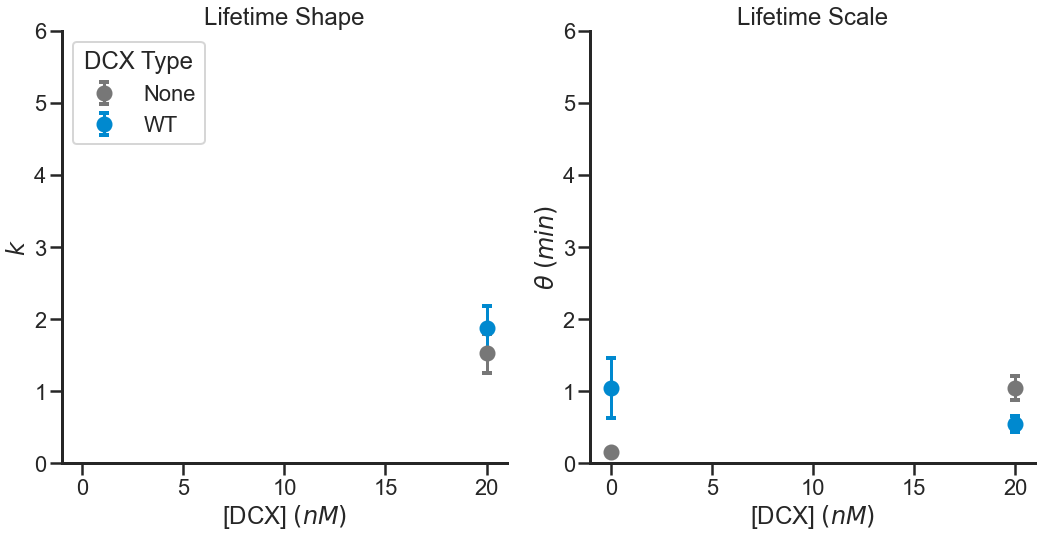

In [110]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(1,2,figsize=(15,8))
#     plt.suptitle('Fitted pooled data', fontsize=30)
selectcoeff = ResultFit.dropna(subset=['Coefficient'])

count = 0
for dcxtype in data[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Parameter']==Lifetime)
                           & (ResultFit[tubulin]==6)].dropna(subset=['Coefficient'])

    x = dcxtype_DF[(dcxtype_DF['Coefficient']==0)][EBconc].values
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['SE'].values

    ax[0].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['SE'].values

    ax[1].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])
    
    count += 1

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].set_ylim(0,6)
    ax[i].set_xlabel( DCXconc)


ax[0].set_title('Lifetime Shape')
ax[0].set_ylabel( r'$k$')

ax[1].set_title('Lifetime Scale')
ax[1].set_ylabel( r'$\theta \; (min)$')


ax[0].legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_lifetimeparms.svg'))